<a href="https://colab.research.google.com/github/Davetepa/Talento_Tech_Files/blob/main/11_Notebook_M%C3%A9todo_Monte_Carlo_y_Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retos:

Database: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

*   Realizar un modelo de predección con los datos orginales ¿Cuál es su error cuadrático medio?
*   Une los datos originales y , realiza un modelo de predección con los datos simulados ¿Cuál es su error cuadrático medio?
*   ¿Los datos simulados realizaron alguna contribución?

## Métodos de Monte-Carlo
Los Métodos de Monte-Carlo son técnicas para analizar fenómenos por medio de algoritmos computacionales, que utilizan y dependen fundamentalmente de la generación de números aleatorios. El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen. El estudio de los Métodos de Monte-Carlo requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la probabilidad para describir los experimentos y procesos aleatorios, la estadística para analizar los datos, las ciencias de la computación para implementar eficientemente los algoritmos y la programación matemática para formular y resolver problemas de optimización.

In [40]:
import requests
import io
import tempfile  # For creating temporary files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import yfinance as yf
np.random.seed(1984)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")

In [41]:
# Download data from a Google Drive link (consider using a more reliable source for production)
url = 'https://drive.usercontent.google.com/download?id=1UsgKhOGsOeNv8M1FakduzI7zD2jUzXv0&export=download&authuser=0&confirm=t&uuid=28337280-6df0-4c44-b4ea-71ad740ee639&at=AENtkXYuMe3S36uQP9sbF5fM4GM1:1730691204204'
response = requests.get(url)
response.raise_for_status()  # Raise an exception if download fails

# Create a temporary database file with suffix ".csv" and set to not be deleted automatically
with tempfile.NamedTemporaryFile(delete=False, suffix=".csv") as temp_db:
    # Write the downloaded content to the temporary file
    temp_db.write(response.content)
    # Get the path of the temporary database file
    temp_db_path = temp_db.name

In [42]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df = pd.read_csv(temp_db_path, delimiter=";")

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

<ipython-input-42-4615ac99eb40>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_db_path, delimiter=";")


El dataset se cargó exitosamente


In [94]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])
df = df.dropna(subset=['Date'])

# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# tipo de dato que es date
print(df['Date'].dtype)

print(df.head(1))
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])
df = df.dropna(subset=['Date'])

# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# tipo de dato que es date
print(df['Date'].dtype)

print(df.head(1))

# agrupar por día
daily_data = df.groupby(df['Date'])['Global_active_power'].sum()

# Reset the index to make 'Date' a regular column again
daily_data = daily_data.reset_index()

# Now, when you call head(), 'Date' will be visible
print(daily_data.head())


datetime64[ns]
        Date      Time  Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                 0.418  234.840   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
datetime64[ns]
        Date      Time  Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                 0.418  234.840   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
        Date  Global_active_power
0 2006-12-16             1209.176
1 2006-12-17             3390.460
2 2006-12-18             2203.826
3 2006-12-19             1666.194
4 2006-12-20             2225.748


In [97]:
daily_data['Date'] = pd.to_datetime(daily_data['Date'], errors='coerce')
daily_data

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1428,2010-11-22,2041.536
1429,2010-11-23,1577.536
1430,2010-11-24,1796.248
1431,2010-11-25,1431.164


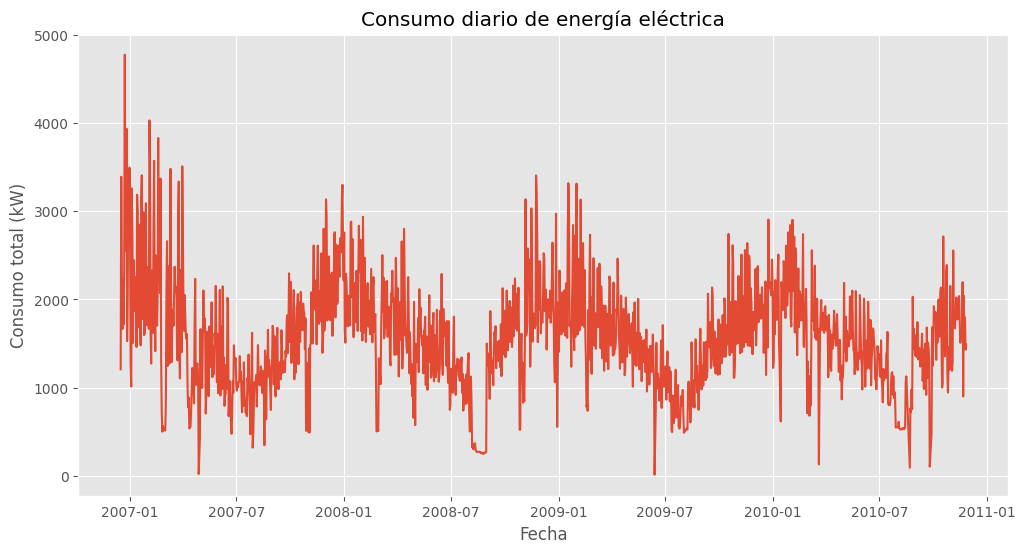

In [99]:
# prompt: graficar daily_data
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Global_active_power'])
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

# **Reto**

In [101]:
print(daily_data.describe())
print("\n")
print(daily_data.dtypes)
print("\n")
print(daily_data.index)
print("\n")
print(daily_data.head(5))
print("\n")
print(daily_data.tail(5))
print("\n")
print(daily_data.shape)

                                Date  Global_active_power
count                           1433          1433.000000
mean   2008-12-02 20:05:51.709699840          1561.078061
min              2006-12-16 00:00:00            14.218000
25%              2007-12-10 00:00:00          1165.700000
50%              2008-12-02 00:00:00          1542.650000
75%              2009-11-26 00:00:00          1893.608000
max              2010-11-26 00:00:00          4773.386000
std                              NaN           606.819667


Date                   datetime64[ns]
Global_active_power           float64
dtype: object


RangeIndex(start=0, stop=1433, step=1)


        Date  Global_active_power
0 2006-12-16             1209.176
1 2006-12-17             3390.460
2 2006-12-18             2203.826
3 2006-12-19             1666.194
4 2006-12-20             2225.748


           Date  Global_active_power
1428 2010-11-22             2041.536
1429 2010-11-23             1577.536
1430 2010-11-24           

In [104]:
# Preparar los datos para el modelo
X = daily_data['Date'].astype('int64').astype('float64') # Convertir fecha a timestamp
X = X.values.reshape(-1, 1)
y = daily_data['Global_active_power']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Crear y entrenar el modelo lineal
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [106]:
# Crear y entrenar Modelo polinomial de grado 2
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

LinearRegression()

In [107]:
# Realizar predicciones
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_poly = modelo_poly.predict(X_test_poly)

In [108]:
# Evaluar los modelos
from sklearn.metrics import mean_squared_error, r2_score

mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Modelo Lineal:")
print(f"Error cuadrático medio: {mse_lineal}")
print(f"R-cuadrado: {r2_lineal}")

print("\nModelo Polinomial:")
print(f"Error cuadrático medio: {mse_poly}")
print(f"R-cuadrado: {r2_poly}")

Modelo Lineal:
Error cuadrático medio: 382334.7479234012
R-cuadrado: 0.008886976368699395

Modelo Polinomial:
Error cuadrático medio: 382428.05389083154
R-cuadrado: 0.008645102565690288


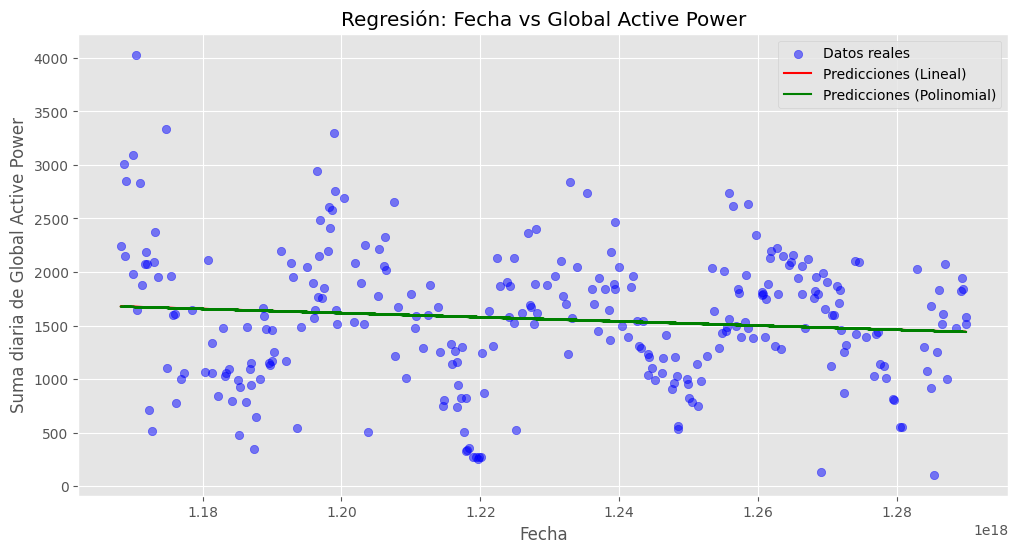

In [109]:
# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred_lineal, color='red', label='Predicciones (Lineal)')
plt.plot(X_test, y_pred_poly, color='green', label='Predicciones (Polinomial)')
plt.xlabel('Fecha')
plt.ylabel('Suma diaria de Global Active Power')
plt.title('Regresión: Fecha vs Global Active Power')
plt.legend()

In [110]:
# los coeficientes del modelo lineal
print("\nModelo Lineal:")
print(f"Intercepto: {modelo_lineal.intercept_}")
print(f"Coeficiente: {modelo_lineal.coef_[0]}")

# los coeficientes del modelo polinomial
print("\nModelo Polinomial:")
print(f"Intercepto: {modelo_poly.intercept_}")
print(f"Coeficientes: {modelo_poly.coef_}")


Modelo Lineal:
Intercepto: 3963.5253471779442
Coeficiente: -1.9556765909438674e-15

Modelo Polinomial:
Intercepto: 2757.8588337961737
Coeficientes: [-3.22470561e-52 -7.92366451e-34]
